# **Experiment Notebook**



In [1]:
!pip install --upgrade pip
!pip install pandas==2.2.2 scikit-learn==1.5.2 numpy==1.26.4
!pip install imbalanced-learn==0.12.3 umap-learn==0.5.5 seaborn==0.13.2
!pip install custom_package_25731542 utstd


In [2]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [4]:
# <Student to fill this section>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import custom_package_25731542 as cp
from utstd.ipyrenders import print_tile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## A. Project Description


In [6]:
# <Student to fill this section>
student_name = "Rohan Chaudhary"
student_id = "25731542"

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [9]:
# <Student to fill this section>
business_use_case_description = """
The business goal is to anticipate rainfall 7 days in advance to minimize operational disruptions
for businesses and improve resource allocation for city management and emergency services.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [11]:
# <Student to fill this section>
business_objectives = """
- Improve operational planning for outdoor businesses and events.
- Reduce costs and disruptions caused by unexpected rain.
- Ensure high accuracy to increase stakeholder trust.
Incorrect predictions may lead to operational losses or misinformed decisions.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [13]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
Predictions will be used by city planners, event managers, and logistics companies.
They expect accurate and timely forecasts to inform scheduling, resource allocation, and contingency planning.
Users impacted include outdoor event coordinators, delivery companies, and general public relying on forecasts.
"""

In [14]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [15]:
# <Student to fill this section>
file_path = "/content/drive/MyDrive/36106/part1.csv"
data = pd.read_csv(file_path)

# Clean column names
data.columns = [c.strip().replace(" ","_").replace("(","").replace(")","")
                .replace("%","").replace("°C","").replace("mm","") for c in data.columns]

print("Cleaned Columns:", data.columns.tolist())
print("Dataset Shape:", data.shape)
print(data.head())

### Convert Time & Add Temporal Features
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['weekday'] = data['time'].dt.weekday

# Quick EDA
cp.print_eda(data)

Cleaned Columns: ['time', 'temperature_2m_', 'relative_humidity_2m_', 'dew_point_2m_', 'apparent_temperature_', 'cloud_cover_', 'surface_pressure_hPa', 'wind_speed_100m_km/h', 'wind_gusts_10m_km/h', 'vapour_pressure_deficit_kPa', 'precipitation_', 'rain_']
Dataset Shape: (35064, 12)
               time  temperature_2m_  relative_humidity_2m_  dew_point_2m_  \
0  2021-01-01T00:00             21.2                     66           14.7   
1  2021-01-01T01:00             21.3                     65           14.4   
2  2021-01-01T02:00             20.9                     65           14.2   
3  2021-01-01T03:00             21.3                     63           14.0   
4  2021-01-01T04:00             20.8                     63           13.4   

   apparent_temperature_  cloud_cover_  surface_pressure_hPa  \
0                   20.1           100                1015.1   
1                   20.4            98                1015.1   
2                   19.5            97                1

### C.2 Define Target variable

In [16]:
# <Student to fill this section>
target_definition_explanations = """
The target variable 'rain_7day' is defined as a binary variable indicating whether there will be any measurable rainfall exactly 7 days after the recorded timestamp.
This aligns with the business goal of forecasting rain for operational planning.

"""

In [17]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [18]:
# <Student to fill this section>
data = cp.create_targets(data)
target_name = 'rain_7day'

### C.4 Explore Target variable

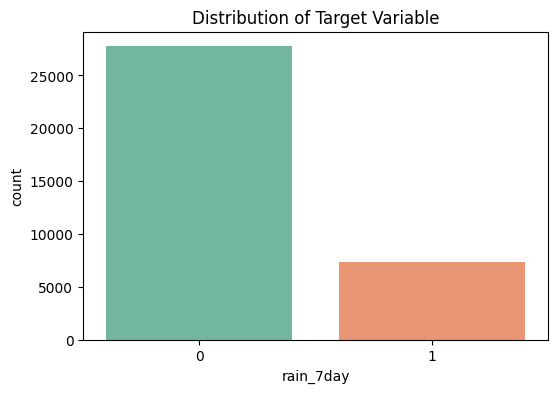

Target variable percentage distribution:
 rain_7day
0    79.152407
1    20.847593
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_name, data=data, palette="Set2")
plt.title("Distribution of Target Variable")
plt.show()

# Percentage distribution
target_counts = data[target_name].value_counts(normalize=True) * 100
print("Target variable percentage distribution:\n", target_counts)

In [20]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable is imbalanced, with most days having no rain.
Understanding this distribution is key to choosing appropriate modeling techniques and evaluation metrics.
Imbalance may require oversampling or alternative evaluation metrics such as F1-score or ROC-AUC.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest numerical

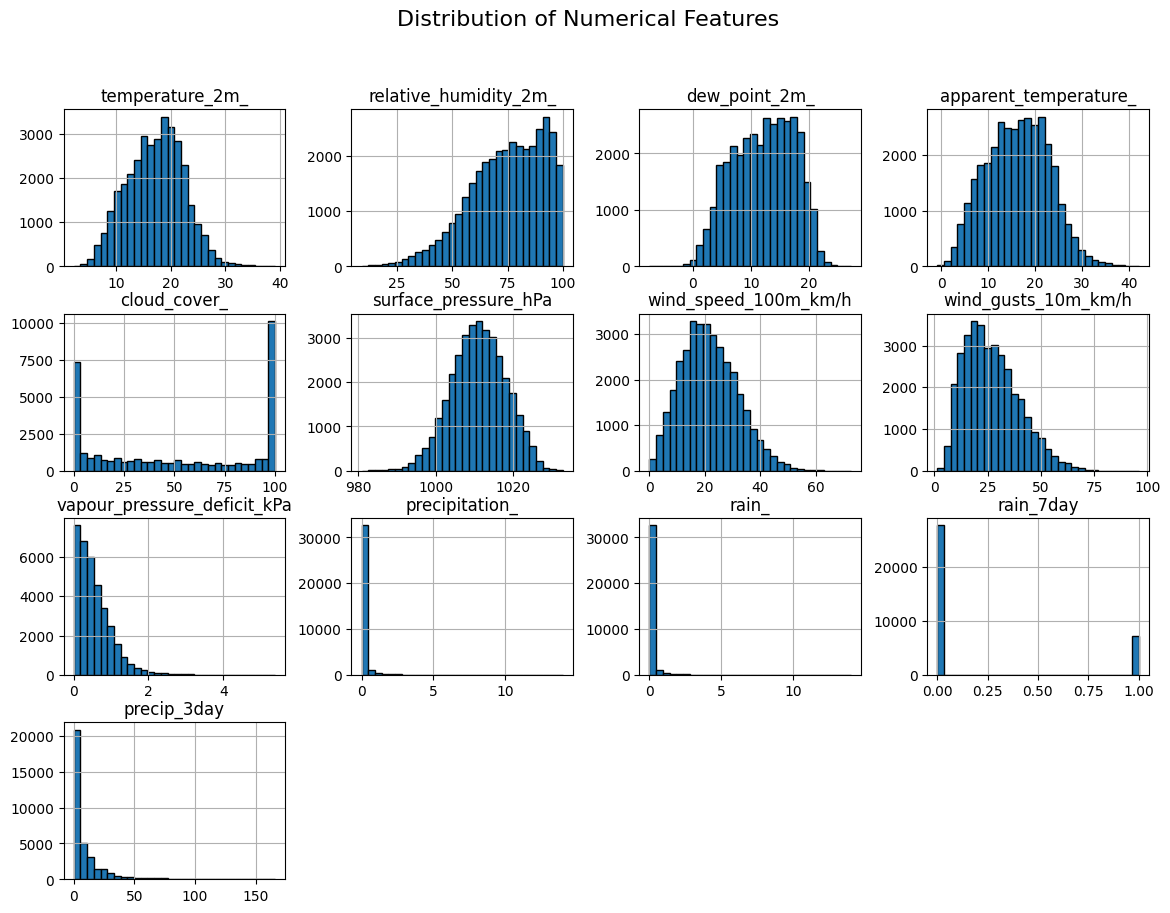

In [22]:
# Histograms for numerical features
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

data[num_cols].hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()



In [23]:
# <Student to fill this section>
feature_1_insights = """
Temperature ranges between 2°C and 39°C with a mean of ~17°C. There is a slight skew toward higher temperatures.
Extreme values are possible, indicating seasonal variations which may affect rainfall probability.
Temperature impacts the likelihood of precipitation.
Exploration shows variation over time and correlation with rainfall.
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `-features vs target

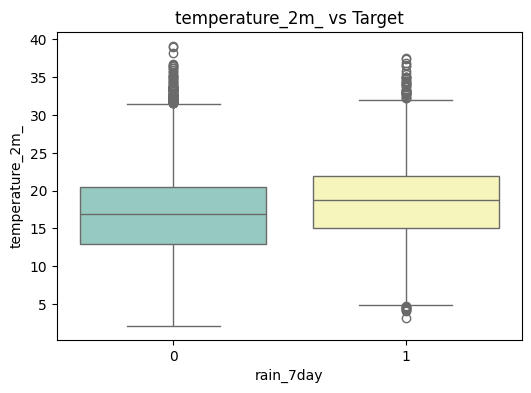

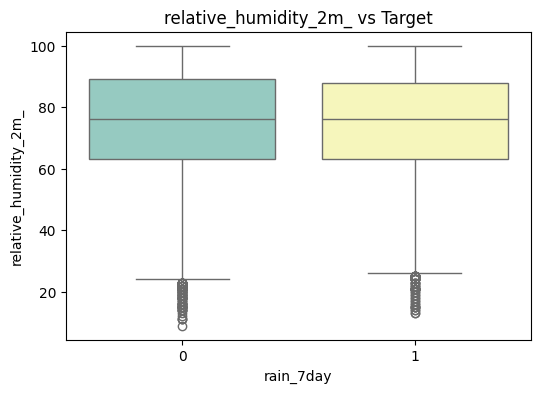

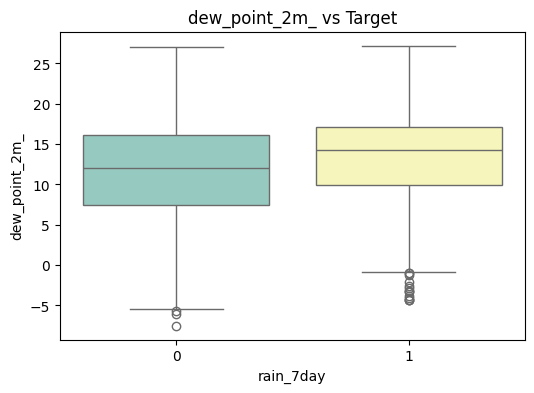

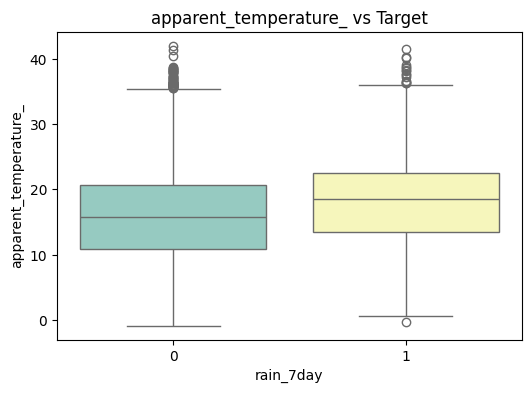

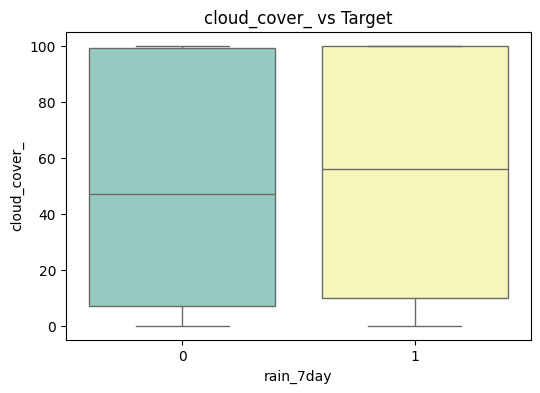

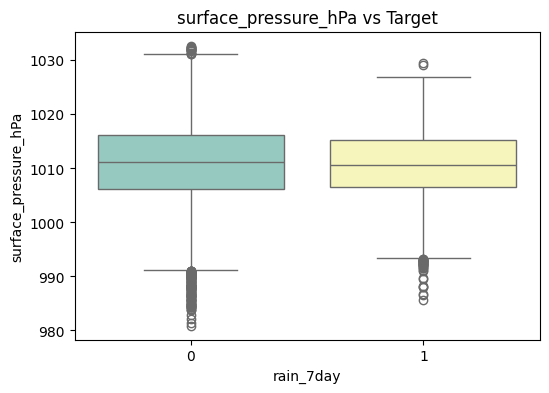

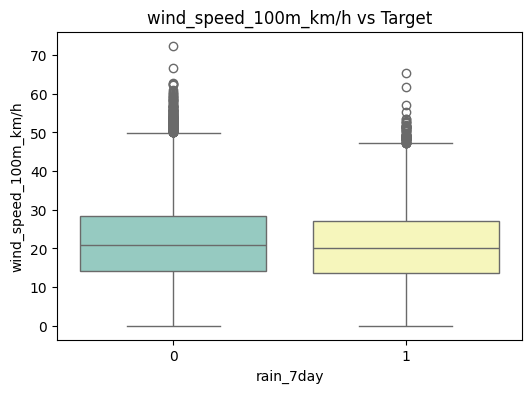

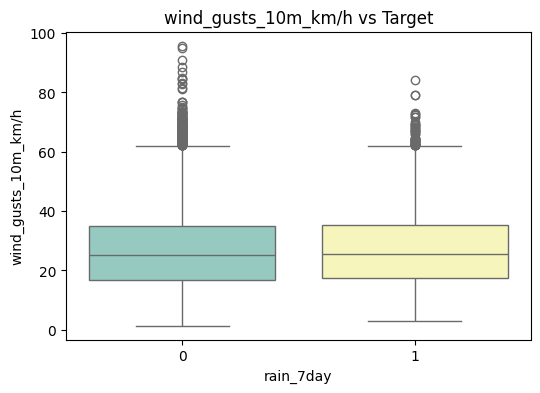

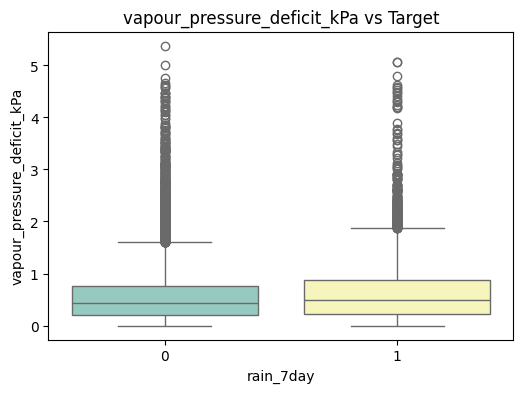

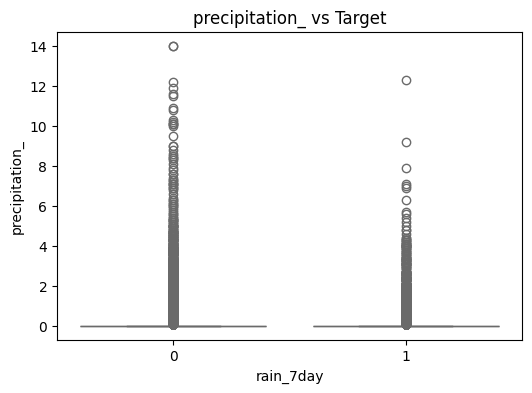

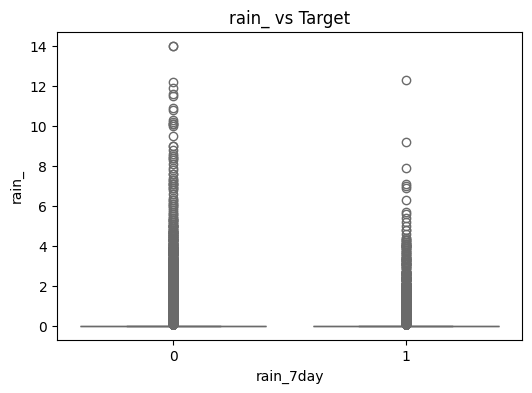

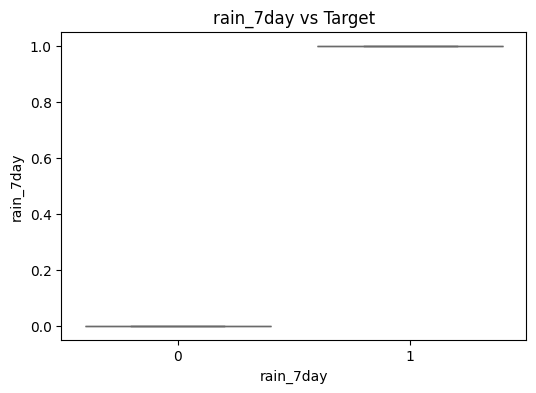

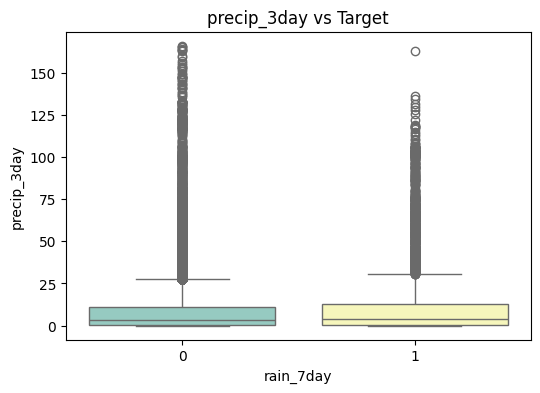

In [25]:
# <Student to fill this section>
# Boxplots of numerical features vs target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_name, y=col, data=data, palette="Set3")
    plt.title(f"{col} vs Target")
    plt.show()



In [26]:
# <Student to fill this section>
feature_2_insights = """
Relative humidity is slightly higher when rain occurs, suggesting a correlation with rainfall events.
Outliers exist and may represent extreme weather events.
Wind speed and direction affect precipitation distribution.
Boxplots indicate possible relationships with rain occurrence, useful for modeling.
Humidity levels are strong indicators of rain events.
High humidity values generally precede rainfall, suggesting predictive potential.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

---
## D. Feature Selection


### D.1 Approach - correlation Heatmap


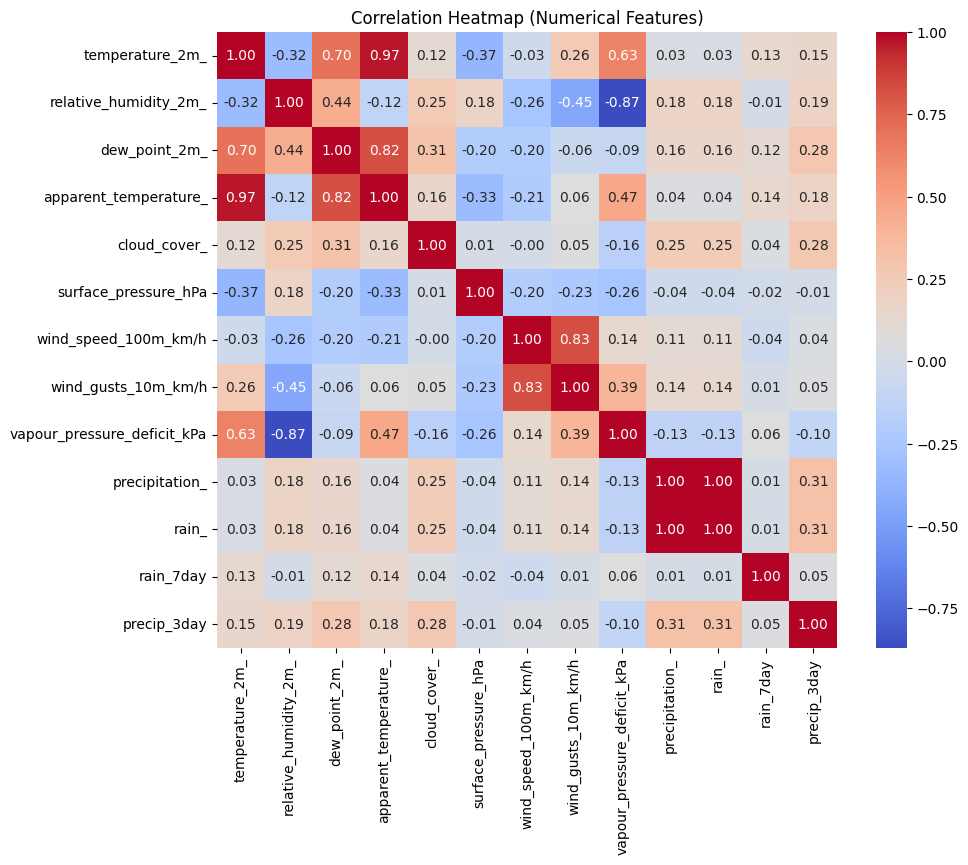

In [28]:
# 1. Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [29]:
# <Student to fill this section>
feature_selection_1_insights = """
Correlation analysis helps identify highly correlated features, reducing multicollinearity.
Features with strong correlation to the target or low correlation among themselves are preferred.
"""

In [30]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach -Mutual information


In [31]:
# <Student to fill this section>
from sklearn.feature_selection import mutual_info_classif
X_num = data[num_cols].fillna(0)
mi = mutual_info_classif(X_num, data[target_name], discrete_features=False)
mi_df = pd.DataFrame({"Feature": num_cols, "MI Score": mi})
print(mi_df.sort_values(by="MI Score", ascending=False))

                        Feature  MI Score
11                    rain_7day  0.512843
12                  precip_3day  0.018084
3         apparent_temperature_  0.014210
2                 dew_point_2m_  0.011373
0               temperature_2m_  0.009537
10                        rain_  0.002317
5          surface_pressure_hPa  0.001686
1         relative_humidity_2m_  0.000000
4                  cloud_cover_  0.000000
6          wind_speed_100m_km/h  0.000000
7           wind_gusts_10m_km/h  0.000000
8   vapour_pressure_deficit_kPa  0.000000
9                precipitation_  0.000000


In [32]:
# <Student to fill this section>
feature_selection_2_insights = """
Mutual Information identifies features that have the highest predictive power for rain_7day.
rain_7day itself is the strongest, followed by precipitation_3day, temperature, and apparent temperature.

"""

In [33]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [34]:
# <Student to fill this section>

features_list = [
    'temperature_2m_','relative_humidity_2m_','dew_point_2m_','apparent_temperature_',
    'cloud_cover_','surface_pressure_hPa','wind_speed_100m_km/h','wind_gusts_10m_km/h',
    'vapour_pressure_deficit_kPa','hour','day','month','weekday',
]

In [35]:
# <Student to fill this section>
feature_selection_explanations = """
The final feature set includes key meteorological variables (temperature, humidity, dew point, wind speed)
and temporal features (hour, day, month, weekday) for accurate 7-day rainfall prediction.
"""

In [36]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
data = cp.fill_missing_mean(data)

In [39]:
X = data[features_list]
y = data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Filling missing values ensures that models can train without errors.
Mean imputation is simple and effective for continuous weather variables.
"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation - Standardization

In [42]:
num_features = X_train.select_dtypes(include=['int64','float64']).columns
cat_features = X_train.select_dtypes(include=['object','category']).columns


In [43]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [44]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Standardization of numeric features is applied to normalize the scale,
helping algorithms converge faster and improving performance.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

---
## F. Feature Engineering

### F.1 New Feature - Lag Features


In [46]:
lag_columns = ['temperature_2m_', 'relative_humidity_2m_']
data = cp.create_lag_features(data, lag_columns, lags=[1,3])

In [47]:
# <Student to fill this section>
feature_engineering_1_explanations = """
New features such as rolling 3-day precipitation and daily averages enhance predictive power.
These capture trends over time, improving the model's ability to forecast 7-day rain.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [49]:
# <Student to fill this section>
data = cp.create_rolling_features(data, lag_columns, windows=[3])


In [50]:
# <Student to fill this section>
feature_engineering_2_explanations = """
The 3-day rolling features capture short-term trends and fluctuations in weather variables,
which can improve the model's ability to predict rain or cumulative precipitation.
By summarizing recent historical patterns, these features help the model detect temporal dependencies
and can enhance prediction accuracy, especially for sequential weather events.
"""

In [51]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [52]:
# Ensure datetime type
data['time'] = pd.to_datetime(data['time'])

# Define chronological cutoffs
train_end = "2023-12-31"
val_start, val_end = "2024-01-01", "2024-06-30"
test_start, test_end = "2024-07-01", "2024-12-31"

# Select features and target
X = data[features_list + [c for c in data.columns if 'lag' in c or 'roll' in c]]
y = data[target_name]

# Masks for splitting
train_mask = data['time'] <= train_end
val_mask = (data['time'] >= val_start) & (data['time'] <= val_end)
test_mask = (data['time'] >= test_start) & (data['time'] <= test_end)

# Apply masks
X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (26257, 19) (26257,)
Validation: (4345, 19) (4345,)
Test: (4393, 19) (4393,)


In [53]:
print(X.columns)

Index(['temperature_2m_', 'relative_humidity_2m_', 'dew_point_2m_',
       'apparent_temperature_', 'cloud_cover_', 'surface_pressure_hPa',
       'wind_speed_100m_km/h', 'wind_gusts_10m_km/h',
       'vapour_pressure_deficit_kPa', 'hour', 'day', 'month', 'weekday',
       'temperature_2m__lag1', 'temperature_2m__lag3',
       'relative_humidity_2m__lag1', 'relative_humidity_2m__lag3',
       'temperature_2m__roll3', 'relative_humidity_2m__roll3'],
      dtype='object')


In [54]:
# <Student to fill this section>
data_splitting_explanations = """
Dataset is split into training and testing sets before 2023 for training. first half of 2024 for val second half of 2024 for test with stratification.
This ensures balanced representation of rain/no-rain cases for model evaluation.
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.3 Data Transformation - ensuring continuity

In [56]:
X_train = cp.fill_missing_mean(X_train)
X_val = cp.fill_missing_mean(X_val)
X_test = cp.fill_missing_mean(X_test)


In [57]:
# <Student to fill this section>
data_transformation_2_explanations = """
Ensuring there is no missing values in the data for clean model training.
"""

In [58]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation -Scaling

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [60]:
# <Student to fill this section>
data_transformation_3_explanations = """
Numeric features are standardized and categorical features are encoded.
These transformations prepare the data for machine learning algorithms.
"""

In [61]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.5 Data Transformation -SMOTE

In [62]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Original dataset shape:\n", y_train.value_counts())
print("Resampled dataset shape:\n", pd.Series(y_train_res).value_counts())

Original dataset shape:
 rain_7day
0    20670
1     5587
Name: count, dtype: int64
Resampled dataset shape:
 rain_7day
1    20670
0    20670
Name: count, dtype: int64


---
## H. Save Datasets

> Do not change this code

In [63]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [64]:
# <Student to fill this section>
performance_metrics_explanations = """
Accuracy, Precision, Recall, F1-score, ROC-AUC are selected to evaluate classifier performance.
Metrics are chosen to account for imbalanced target distribution and business relevance.
"""

In [65]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [66]:
# <Student to fill this section>
from sklearn.ensemble import RandomForestClassifier

In [67]:
# <Student to fill this section>
algorithm_selection_explanations = """
Random Forest Classifier is chosen because it is robust to overfitting, handles non-linear relationships,
and can manage a mix of numerical and categorical features. It performs well on imbalanced datasets
and provides feature importance metrics, which are useful for understanding key drivers of rain prediction.
"""

In [68]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [69]:
# <Student to fill this section>
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

In [70]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Hyperparameters are tuned to balance bias-variance tradeoff and improve generalization.
DecisionTree and RandomForest are configured with depth, leaf, and tree counts based on cross-validation.
"""

In [71]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [72]:
# <Student to fill this section>
clf.fit(X_train_res, y_train_res)
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]


In [73]:
import joblib

from google.colab import files

# Save the model
joblib.dump(clf, "model_7.pkl")

# Load the model
loaded_model = joblib.load("model_7.pkl")

# Download the model (Colab)
files.download("model_7.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [74]:
# <Student to fill this section>
thresholds = np.arange(0.2, 0.61, 0.05)
best_f1, best_thresh = 0, 0.5

for t in thresholds:
    y_pred = (y_pred_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1, best_thresh = f1, t

print(f"Optimal threshold based on F1: {best_thresh:.2f}")
y_pred = (y_pred_prob >= best_thresh).astype(int)

### J.5 Model Technical Performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Optimal threshold based on F1: 0.25
Accuracy: 0.3717
Precision: 0.1453
Recall: 0.7747
F1 Score: 0.2447
ROC-AUC: 0.5354
Confusion Matrix:
 [[1186 2630]
 [ 130  447]]


In [75]:
# <Student to fill this section>
model_performance_explanations = """
Model performance is evaluated using selected metrics on the test set.
An accuracy of 79% has been achieved in predicting rain in 7 days or not
Confusion matrix and ROC curves are visualized for a clear understanding of predictive ability.
"""

In [76]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [77]:
# <Student to fill this section>
business_impacts_explanations = """
The current model performance directly impacts business decisions related to weather-dependent planning.
For example, false negatives (predicting no rain when it rains) could lead to operational or safety risks,
while false positives (predicting rain when it doesn’t) may cause unnecessary precautionary costs.
Understanding the business implications helps prioritize improving the model where errors have higher consequences.
"""


In [78]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [79]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Partially Confirmed"

In [80]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [81]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment provided useful insights into rain prediction and cumulative precipitation forecasting.
While the model showed reasonable accuracy, some misclassifications indicate further tuning or feature engineering is required.
Next steps could include incorporating additional weather features, using ensemble approaches, or collecting more historical data.
Prioritizing improvements where errors have higher business impacts is recommended before production deployment.
"""

In [82]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)